#Problem Statement


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#Hypothesis Generation

Hypothesis for the above market store problem can be stated by considering relationship with data attribute as follows;

**Outlet_location_type(Tier 1,Tier 2 and Tier 3) and Item_outlet_sales:**

Null Hypothesis(**H0**) : There is no significant relationship between the Outlet_location_type and Item_outlet_sales across 10 different cities.

Alternative Hypothesis(**H1**): There is significant relationship between the Outlet_location_type and Item_outlet_sales across 10 different cities.

**Outlet_type and Item_MRP:**

Null Hypothesis(**H0**) : There is no significant relationship between the  Item_MRP and Item_Outlet_Sales.

Alternative Hypothesis(**H1**): There is significant relationship between the  Item_MRP and Item_Outlet_Sales.




#Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np

train=pd.read_csv('/content/drive/MyDrive/Projects Datasets/Train.csv')
test=pd.read_csv('/content/drive/MyDrive/Projects Datasets/Test.csv')


In [ ]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


#Data Structure and Content

Imagine the data is Stored in the Excel,like in the data spradsheet in the form of Rows and Columns. So, Here in the context of Big Mart Store Problem, We have each row representing sales transacations of individual purchase.
And Columns representing the details of the sales of products like Unique ID of Product(Item_Identifier),weight of it(Item_Weight), Whether it's has low fat or regular fat(Item_Fat_Content),how visible it is on the store shelves (Item_visibility),what's the type of item(Item_Type) and what's the price/value of product(Item_MRP).

We also have the details of the outlet across 10 different cities like types of outlets whether it is Superstore or grocery Store (Outlet_Type),the store it's being sold in (Outlet_Identifier), when it's established(Outlet_Establishment_Year),what's size of outlet(Outlet_Size),where it's located(Outlet_Location_Type).
and Finally,how much money the store made from selling that product(Item_Outlet_Sales).

In [ ]:
# Checking Summary of the Data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here , We can see in the Summary that **Minimum value of Item_Visibility is zero** which makes no sense beacuse when we sold any product in the store or market, Visibility cannot to be zero.

Also, **The Outlet_Establishment_Year ranges from 1985 to 2009** which is just showing which is min and max value in these summary.
Instead of, we can convert this year to get the age of Store i.e. how old the store it is.



In [ ]:
#Checking the Number Of Missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

As We can see in the above output that **total number of missing values** in the attributes Item_Weight, Outlet_Size and Item_Outlet_Sales are 2439, 4016 and 5681 respectively.
So, In the Further Data Cleaning Process or In the EDA Process I'm going to
 either delete or impute these missing data.

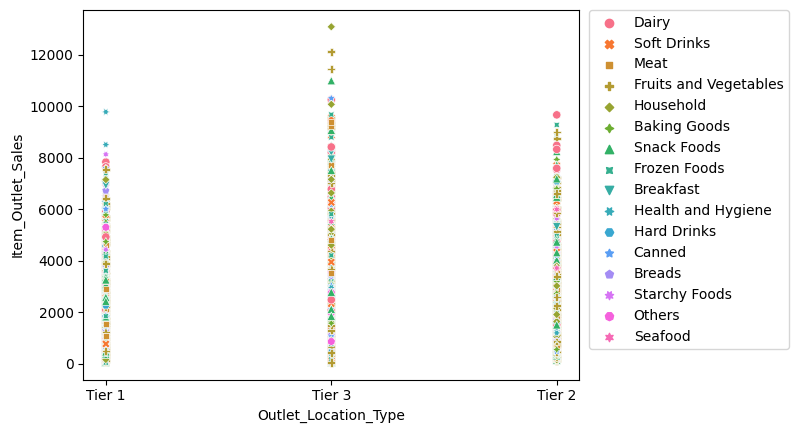

In [ ]:
#Drawing a Scatter Plot between Outlet_location_Type and Item_Outlet_sales
import seaborn
import matplotlib.pyplot as plt

seaborn.scatterplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",hue="Item_Type",style="Item_Type",data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

The above Scatterplot helps us understand **how the location of outlets (Outlet_Location_Type) relates to the sales of items (Item_Outlet_Sales).** The different colors and styles represent various types of items, making it easier to identify patterns or trends in sales across different outlet locations and item types.

# Exploratory Data Analysis and Univariate Analysis                                                           

##Missing Values Treatment

**Replacing Null Values in each column with the mean of the column**

In [ ]:
mean_item_weight = data['Item_Weight'].mean()
data['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [ ]:
mean_sales = data['Item_Outlet_Sales'].mean()
data['Item_Outlet_Sales'].fillna(mean_sales, inplace=True)

Since Outlet Size has Categorical Value.So, First we have to Convert this value into Numeric Values to perform missing values imputation.

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

for col in categorical_columns:
    print(f'\nFrequency of Categories for variable {col}')
    print(data[col].value_counts())



Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int6

The Output Gives us the following Observations:

**Item_Fat_Content**: Some 'Low Fat' items are wrongly coded as 'low fat' or 'LF', and 'Regular' items are sometimes listed as 'regular'. We need to make these labels consistent.

**Item_Type**: Not all categories have many items. Combining some categories could give us better results.

**Outlet_Type**: We're thinking about combining Supermarket Type2 and Type3, but we need to check if it's a good idea.

In [ ]:
#Number of unique values in each:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

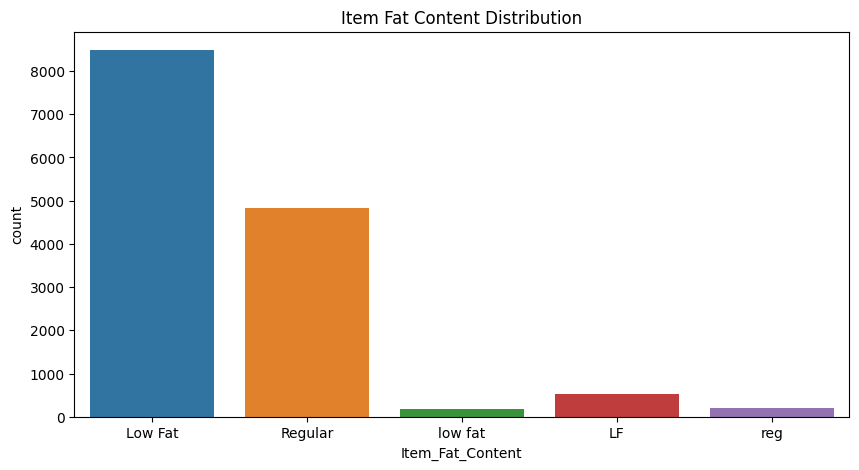

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for Item_Fat_Content
plt.figure(figsize=(10, 5))
sns.countplot(x='Item_Fat_Content', data=data)
plt.title('Item Fat Content Distribution')
plt.show()




**Item Fat Content Distribution:**

Most items are labeled as 'Low Fat', but there are inconsistencies with 'low fat' and 'LF'. It's important to standardize these labels for clarity.

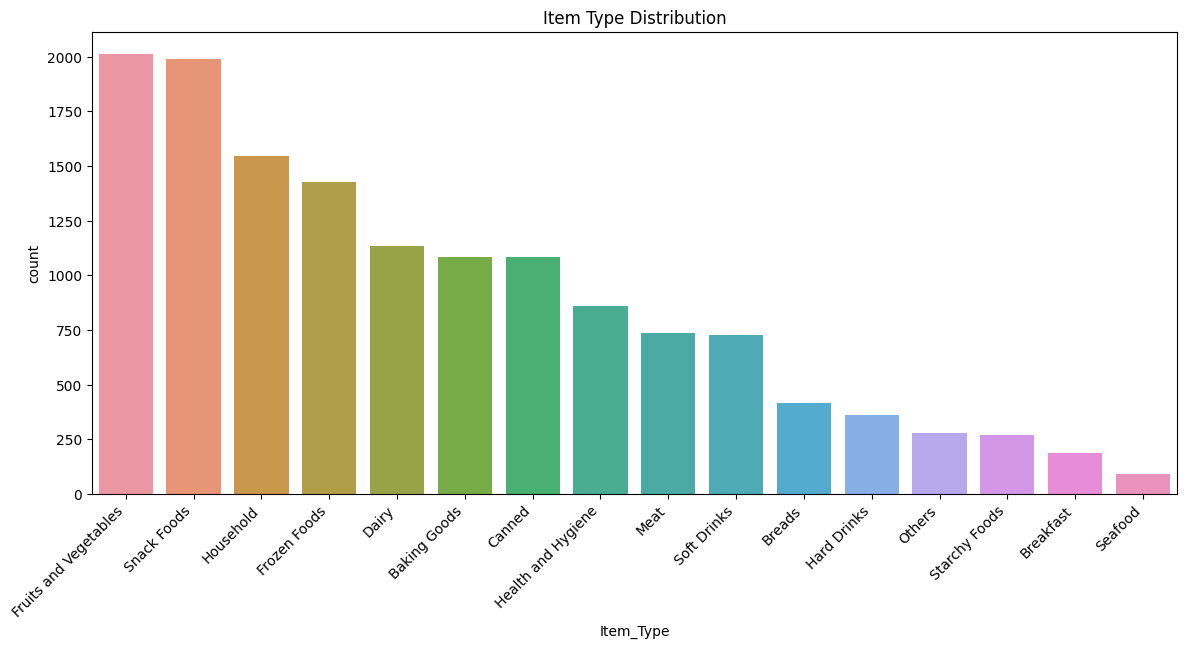

In [ ]:
# Plot for Item_Type
plt.figure(figsize=(14, 6))
sns.countplot(x='Item_Type', data=data, order=data['Item_Type'].value_counts().index)
plt.title('Item Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()



**Item Type Distribution:**

The most common item types are 'Fruits and Vegetables', 'Snack Foods', and 'Household'. Some categories like 'Seafood' and 'Breakfast' have fewer items.

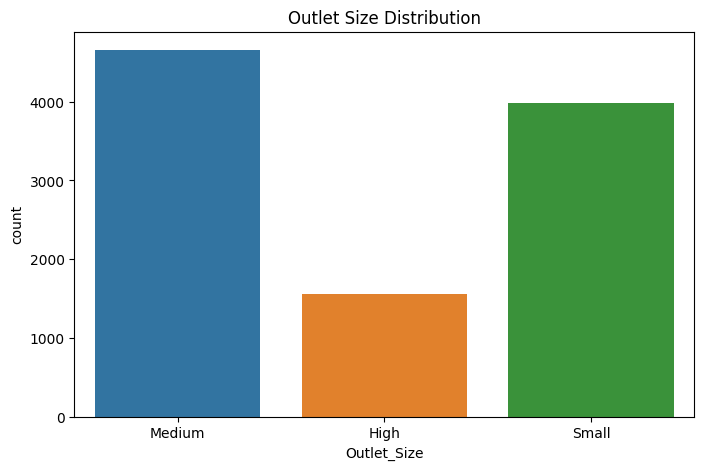

In [ ]:
# Plot for Outlet_Size
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet_Size', data=data)
plt.title('Outlet Size Distribution')
plt.show()



**Outlet Size Distribution:**

Medium-sized outlets are the most common, followed by small-sized outlets. High-sized outlets are the least common.

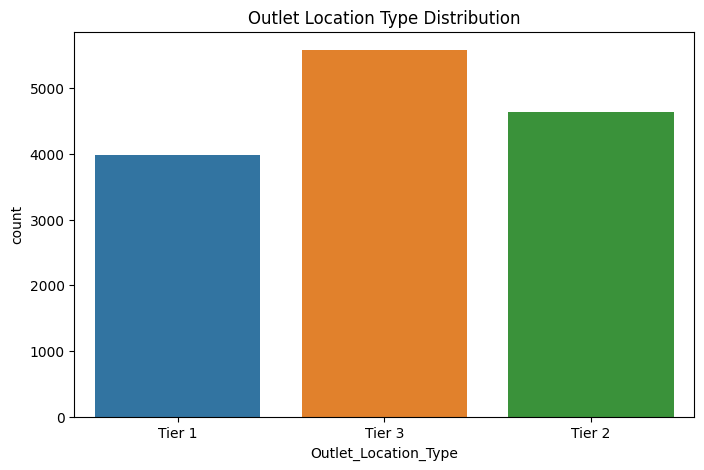

In [ ]:
# Plot for Outlet_Location_Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet_Location_Type', data=data)
plt.title('Outlet Location Type Distribution')
plt.show()




**Outlet Location Type Distribution:**

Most outlets are in Tier 3 locations, followed by Tier 2 and Tier 1. Tier 3 locations have significantly more outlets.

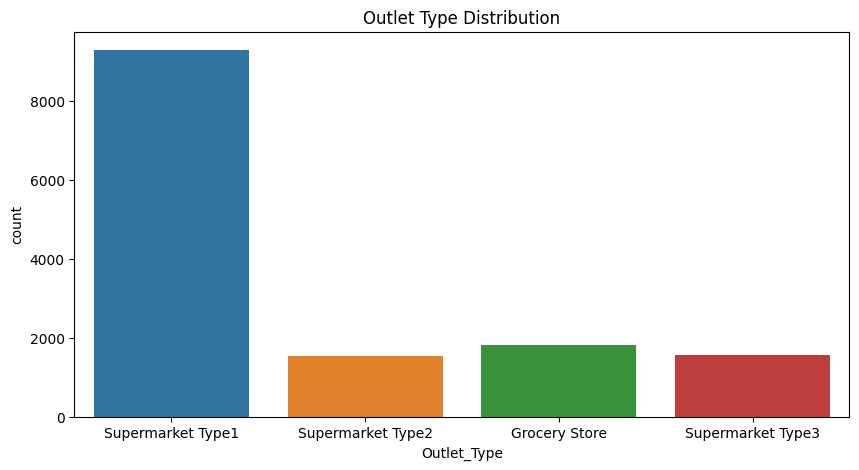

In [ ]:
# Plot for Outlet_Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Outlet_Type', data=data)
plt.title('Outlet Type Distribution')
plt.show()

**Outlet Type Distribution:**

'Supermarket Type1' is the most common outlet type, followed by 'Grocery Store', 'Supermarket Type3', and 'Supermarket Type2'. 'Supermarket Type1' has a notably higher frequency.

#Bivariate Analysis

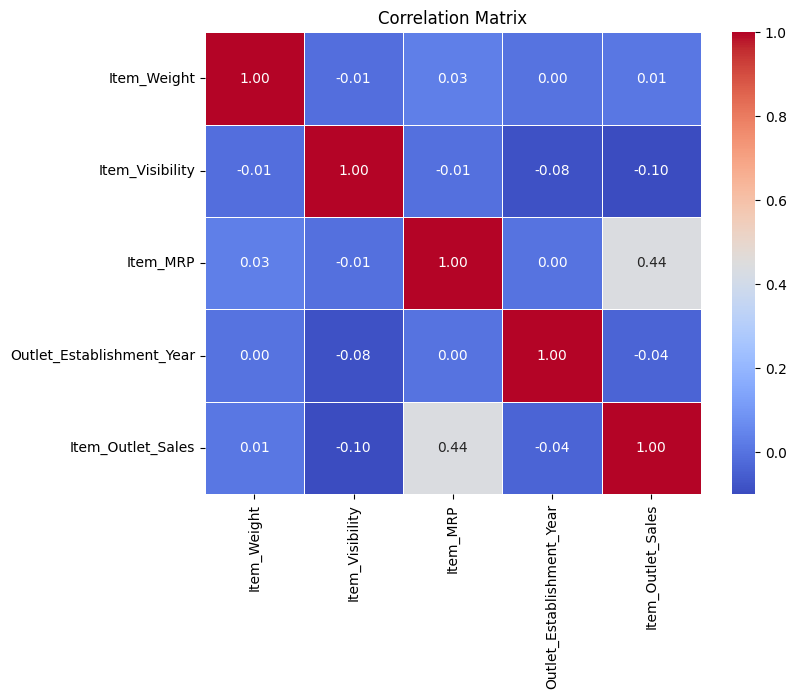

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for analysis
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
selected_data = data[numerical_columns].dropna()

# Correlation Coefficients
correlation_matrix = selected_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



Now,We dummy code all multi-class, categorical variables

In [ ]:
df_dummies = pd.get_dummies(data, drop_first=True)
df_dummies

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train
0,9.30,0.016047,249.8092,1999,3735.138000,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,5.92,0.019278,48.2692,2009,443.422800,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,17.50,0.016760,141.6180,1999,2097.270000,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,19.20,0.000000,182.0950,1998,732.380000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,8.93,0.000000,53.8614,1987,994.705200,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,2181.288914,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
14200,7.60,0.142991,169.1448,2009,2181.288914,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
14201,10.00,0.073529,118.7440,2002,2181.288914,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
14202,15.30,0.000000,214.6218,2007,2181.288914,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


To remove any possible order effects in the data, it is good practice to first shuffle the rows of the data prior to splitting the data into features (X) and outcome (y).


In [ ]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state=42)

Now that the data has been shuffled, we will split the rows in our data into features (X) and the dependent variable (y).

Split df_shuffled into X and y as follows:

In [ ]:
DV = 'Item_Outlet_Sales'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

Split X and y into testing and training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train
11614,12.792854,0.061986,35.6532,1985,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
13954,12.792854,0.083924,261.3910,1985,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8975,20.700000,0.169808,183.4266,1997,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4919,9.100000,0.055515,112.5518,1999,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
7990,9.500000,0.041971,33.3900,2002,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


### Fitting a Simple Linear Regression Model and Determining the Intercept and Coefficient

We instantiate a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Fit the model to the Item_MRP column in the training data

In [ ]:
model.fit(X_train[['Item_MRP']], y_train)

LinearRegression()

Extract the value for the intercept

In [ ]:
intercept = model.intercept_

Extract the value for the coefficient

In [ ]:
coefficient = model.coef_

Now, we can print a message with the formula for predicting item outlet sales based on weights using the code here:

In [ ]:
print(f'Item_Outlet_Sales = {round(intercept,2)} + ({round(coefficient[0],2)} x Item_MRP)')

Item_Outlet_Sales = 851.1 + (9.4 x Item_MRP)


### Generating Predictions and Evaluating the Performance of a Simple Linear Regression Model

In [ ]:
predictions = model.predict(X_test[['Item_MRP']])

We will create a scatterplot of the predicted and actual values.

In [ ]:
import plotly.express as px
from scipy.stats import pearsonr

pear_val = pearsonr(y_test, predictions)[0]

In [ ]:
px.scatter(x = y_test,
           y = predictions,
           title = f'Predicted vs. Actual Values (r = {round(pear_val,2)})',
           labels = {'x':'Y Test (True Values)',
                     'y':'Predicted Values'}
          )

With a Pearson r value of 0.44, there is a moderate, positive, linear correlation between the predicted and actual values.

In [ ]:
from sklearn import metrics

import numpy as np

metrics_df = pd.DataFrame({'Metric': ['MAE','MSE', 'RMSE', 'R-Squared'],
'Value': [metrics.mean_absolute_error(y_test, predictions),
          metrics.mean_squared_error(y_test, predictions),
          np.sqrt(metrics.mean_squared_error(y_test, predictions)),
          metrics.explained_variance_score(y_test, predictions)]}).round(3)
print(metrics_df)

      Metric        Value
0        MAE      851.506
1        MSE  1422769.456
2       RMSE     1192.799
3  R-Squared        0.193


- Mean absolute error (MAE) is the average absolute difference between the predicted values and the actual values.
- Mean squared error (MSE) is the average of the squared differences between the predicted and actual values.
- Root mean squared error (RMSE) is the square root of the MSE.
- R-squared tells us the proportion of variance in the dependent variable that can be explained by the model.   
  
Thus, in this simple linear regression model, Item_MRP explained only 19.3% of the variance in item_outlet sales.

# Missing Values Treatment

In [ ]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

###Replacing Null Values in each column with the mean of the column

In [ ]:
mean_item_weight = data['Item_Weight'].mean()
data['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [ ]:
mean_sales = data['Item_Outlet_Sales'].mean()
data['Item_Outlet_Sales'].fillna(mean_sales, inplace=True)

Since Outlet Size has Categorical Value.So, First we have to Convert this value into Numeric Values to perform missing values imputation.

In [ ]:
# Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
# Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]
# Print frequency of categories
for col in categorical_columns:
    print(f'\nFrequency of Categories for variable {col}')
    print(data[col].value_counts())



Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int6

# Feature Engineering

In [ ]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1076.412666
Supermarket Type1,2262.232963
Supermarket Type2,2069.766739
Supermarket Type3,3088.550567


here pivot table showing the mean sales for each unique value in the 'Outlet_Type' column.

Supermarket Type3 appears to have the highest average sales among the four types of outlets, while Grocery Stores have the lowest average sales.

In [ ]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()


count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Outlet_Years' represents the age of the outlets, and the summary provide insights into the distribution and central tendency of these ages. The outlets vary in age, with the majority falling between 9 and 26 years old.







In [ ]:
# Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


The original 'Item_Fat_Content' variable had inconsistent representations such as 'LF', 'reg', and 'low fat' for 'Low Fat', as well as 'Regular'. After applying a modification, the representations were standardized, resulting in 'Low Fat' and 'Regular' categories.   

In Previous step, we found non-consumable items. Now, in this step, we're creating a special category for them, as they shouldn't have a specified fat content.

In [ ]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

It provides a summary of the distribution of items across the different combined categories based on their type (Food, Non-Consumable, Drinks).

In [ ]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

It shows the distribution of items based on their fat content, where 'Non-Edible' is a separate category created for non-consumable items.

# Label Encoding

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Type_Combined            object
dtype: object

In [ ]:
# Using LabelEncoder() for Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Excluding columns that we don't want to encode
exclude_columns = ['Item_Identifier', 'Outlet_Identifier','Outlet_Location_Type', 'Item_Type_Combined']

categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Print or display the updated DataFrame
print(data)


      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30                 0         0.016047   
1               DRC01         5.92                 2         0.019278   
2               FDN15        17.50                 0         0.016760   
3               FDX07        19.20                 2         0.000000   
4               NCD19         8.93                 1         0.000000   
...               ...          ...               ...              ...   
14199           FDB58        10.50                 2         0.013496   
14200           FDD47         7.60                 2         0.142991   
14201           NCO17        10.00                 1         0.073529   
14202           FDJ26        15.30                 2         0.000000   
14203           FDU37         9.50                 2         0.104720   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0              4  249.8092            OUT049    

Here in the above output, Label encoding transforms categorical columns into numerical representations, making them suitable for machine learning models that require numerical input.

# One Hot Encoding


In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

Now the resulting dataset now has a more numerical format suitable for machine learning algorithms, where each category is represented by 1 or 0 in separate columns.

In [ ]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


# PreProcessing Data

In this step we try to convert data back into train and test data sets.This can be achieved using following code:

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [ ]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [ ]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

<ipython-input-167-c937da755162>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-c937da755162>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Modeling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [ ]:
train.shape

(8523, 34)

In [ ]:
train.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Years                int64
Item_Fat_Content_0          int64
Item_Fat_Content_1          int64
Item_Fat_Content_2          int64
Outlet_Location_Type_0      int64
Outlet_Location_Type_1      int64
Outlet_Location_Type_2      int64
Outlet_Size_0               int64
Outlet_Size_1               int64
Outlet_Size_2               int64
Outlet_Size_3               int64
Outlet_Type_0               int64
Outlet_Type_1               int64
Outlet_Type_2               int64
Outlet_Type_3               int64
Item_Type_Combined_0        int64
Item_Type_Combined_1        int64
Item_Type_Combined_2        int64
Outlet_0                    int64
Outlet_1                    int64
Outlet_2                    int64
Outlet_3                    int64
Outlet_4                    int64
Outlet_5      

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

I Have Performed Simple Linear Regression in the BIVARIATE ANALYSIS Section, You can check out there.

# Regularized Linear Regression (Ridge Regression)

In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [ ]:
from sklearn.linear_model import Ridge


Model Report
RMSE: 1127
CV Score: Mean - 1129 | Std - 43.56 | Min - 1075 | Max - 1211


<Axes: title={'center': 'Model Coefficients'}>

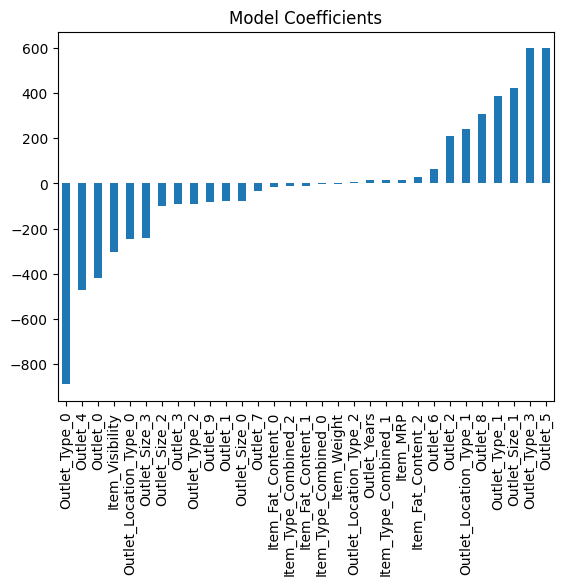

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

The Ridge regression model has an RMSE of 1127 on the training data and a cross-validated performance with a mean RMSE of 1129 and a standard deviation of 43.56. The values provide insights into the model's accuracy and its consistency across different subsets of the data during cross-validation. Lower RMSE values indicate better model performance

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor


Model Report
RMSE: 1073
CV Score: Mean - 1084 | Std - 43.95 | Min - 1019 | Max - 1161


<Axes: title={'center': 'Feature Importances'}>

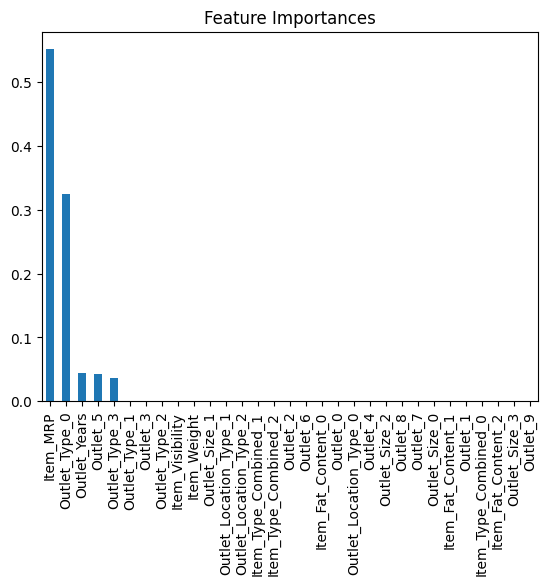

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

 The Random Forest Regressor seems to be providing a good fit to the data, as indicated by the low RMSE and consistent performance in cross-validation.


Model Report
RMSE: 1068
CV Score: Mean - 1082 | Std - 43.41 | Min - 1019 | Max - 1159


<Axes: title={'center': 'Feature Importances'}>

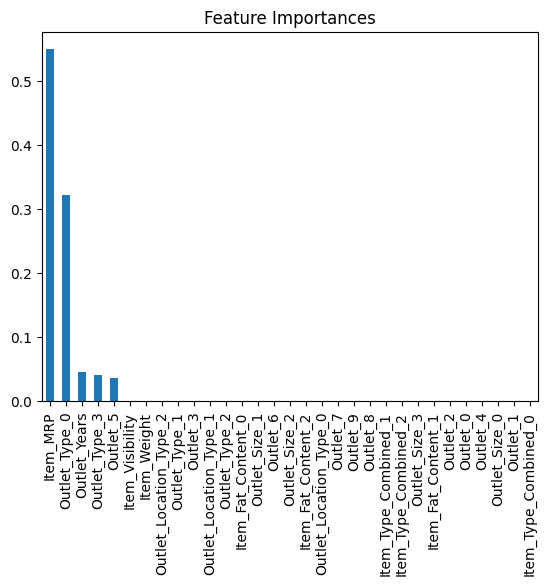

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')

coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)

coef6.plot(kind='bar', title='Feature Importances')

**Feature Importance** :
The bar plot titled "Feature Importances" shows the importance of each feature in making predictions. The higher the bar, the more important the corresponding feature is in predicting the target variable.i.e. Item_MRP.

# XGBoost

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



In [ ]:
# Load the modified dataset
data = pd.read_csv("train_modified.csv")

# Define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

# Define predictors
predictors = [x for x in data.columns if x not in [target] + IDcol]



In [ ]:
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
alg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the algorithm on the training data
alg.fit(train[predictors], train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on training set
train_predictions = alg.predict(train[predictors])

# Calculate RMSE on training set
train_rmse = np.sqrt(mean_squared_error(train[target], train_predictions))

# Predict on testing set
test_predictions = alg.predict(test[predictors])

# Calculate RMSE on testing set
test_rmse = np.sqrt(mean_squared_error(test[target], test_predictions))

In [ ]:
# Print model report
print("\nXGBoost Model Report")
print("Training RMSE: {:.4f}".format(train_rmse))
print("Testing RMSE: {:.4f}".format(test_rmse))



XGBoost Model Report
Training RMSE: 655.4468
Testing RMSE: 1125.9841


A lower RMSE indicates better model performance. In this case, the model seems to perform well on the training data (RMSE of 655.4468), but the testing RMSE is higher (1125.9841), suggesting that there might be some overfitting or the model could be improved to better generalize to unseen data.

# Summary

The project started with a problem statement from BigMart, which aimed to predict the sales of products in its stores based on various attributes. The data provided information on 1559 products across 10 stores in different cities, including details such as item weight, type, visibility, and outlet information.

Hypotheses were generated to understand potential relationships between attributes, such as the connection between outlet location types and item outlet sales. Data cleaning involved handling missing values and inconsistencies in labels, particularly in the "Item_Fat_Content" variable.

Exploratory Data Analysis (EDA) was conducted to gain insights into the distribution of different variables. Visualizations, such as scatter plots and count plots, helped understand patterns and frequencies in the data. During this phase, it was observed that certain categories needed consolidation and adjustments.

The next step involved feature engineering, where new attributes were created to enhance the model's understanding. For instance, the age of outlets was calculated using the establishment year. Categories in the "Item_Fat_Content" variable were standardized, and a new category "Non-Edible" was created for non-consumable items.

Label encoding and one-hot encoding were applied to convert categorical variables into a format suitable for modeling. The data was then split into training and testing sets for further analysis.

Different regression models were implemented, starting with simple linear regression and progressing to more advanced techniques. Regularized linear regression (Ridge Regression) and Random Forest Regressor models were also applied, each providing insights into feature importance.

The XGBoost model was chosen for further exploration. It was trained on the data, and its performance was evaluated. The model exhibited promising results on the training data, but there was a higher Root Mean Squared Error (RMSE) on the testing data, indicating potential overfitting or room for improvement.

In conclusion, the project involved a comprehensive analysis of BigMart sales data, including data cleaning, exploratory analysis, feature engineering, and the implementation of various regression models. The focus was on understanding the factors influencing sales in BigMart stores, and the XGBoost model showed potential, though further tuning may be required for better generalization to new data.